In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\viven\\Downloads\\Students spending\\student_spending.csv")

In [2]:
df

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,22,Female,Senior,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,996,19,Female,Senior,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,997,20,Male,Junior,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App
998,998,22,Non-binary,Senior,Economics,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment App


In [3]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.dropna(subset=['age'], inplace=True)

df['gender'] = df['gender'].astype('category')

df['year_in_school'] = df['year_in_school'].astype('category')

df['major'] = df['major'].astype('category')

df['preferred_payment_method'] = df['preferred_payment_method'].astype('category')


In [4]:
print(df['gender'].value_counts())
print(df['year_in_school'].value_counts())
print(df['major'].value_counts())
print(df['preferred_payment_method'].value_counts())


gender
Male          356
Female        323
Non-binary    321
Name: count, dtype: int64
year_in_school
Senior       254
Freshman     253
Junior       247
Sophomore    246
Name: count, dtype: int64
major
Biology             228
Economics           204
Computer Science    192
Engineering         192
Psychology          184
Name: count, dtype: int64
preferred_payment_method
Mobile Payment App    350
Credit/Debit Card     340
Cash                  310
Name: count, dtype: int64


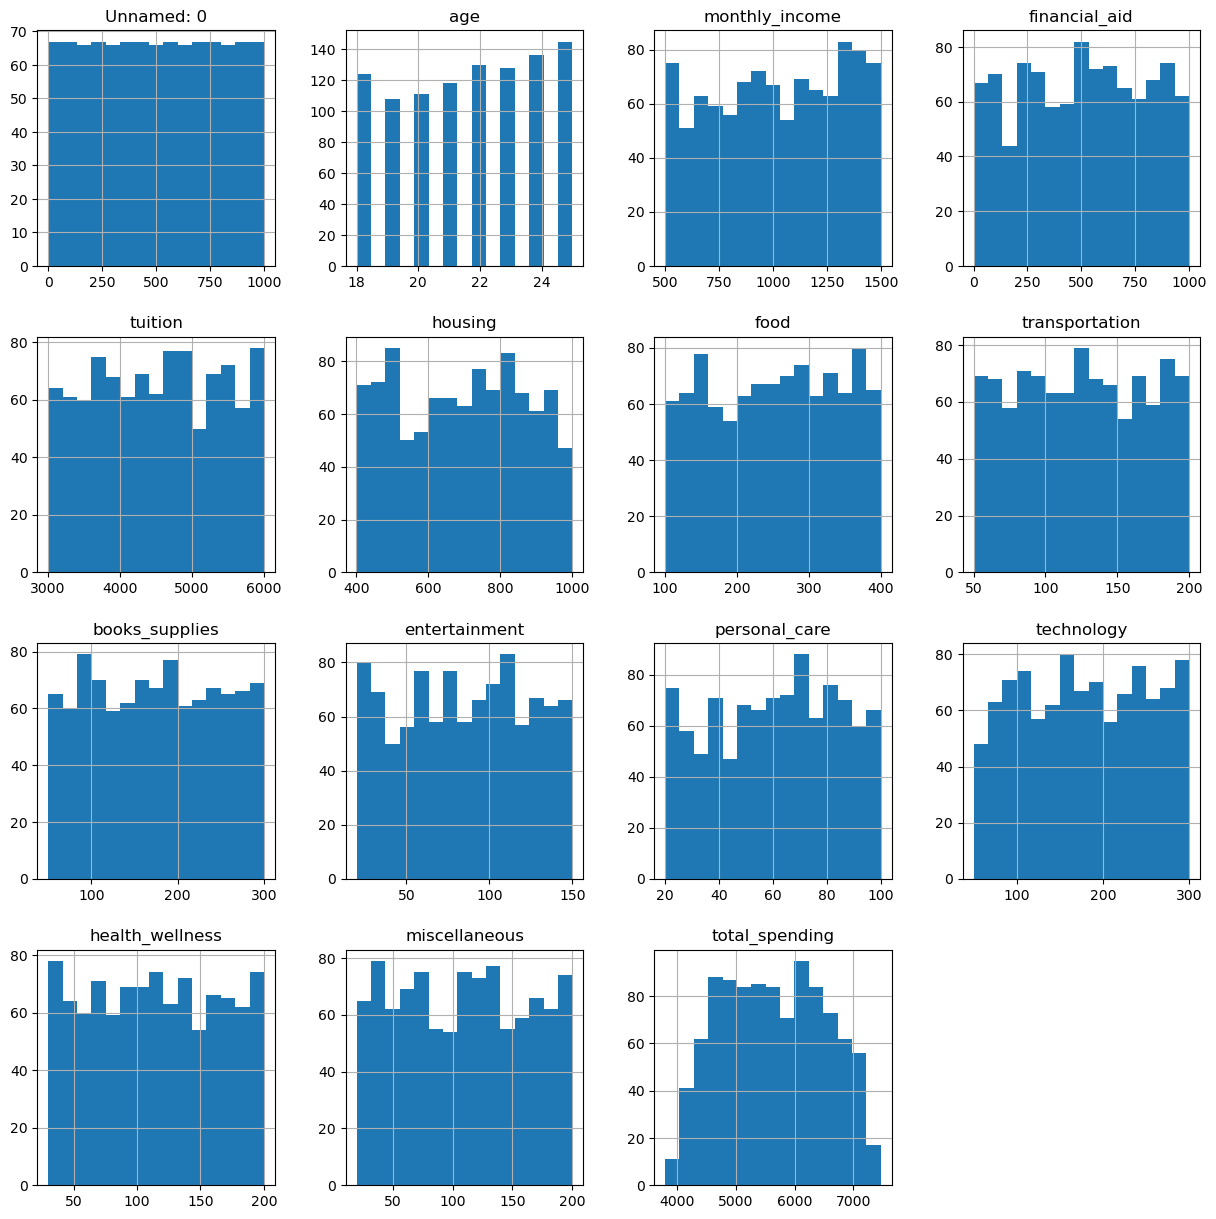

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=15, figsize=(15, 15))
plt.show()


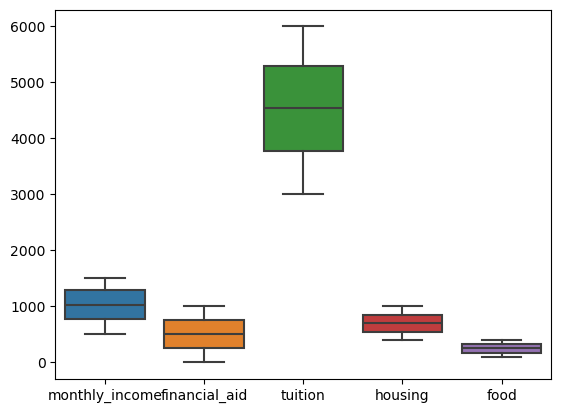

C:\Users\viven\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


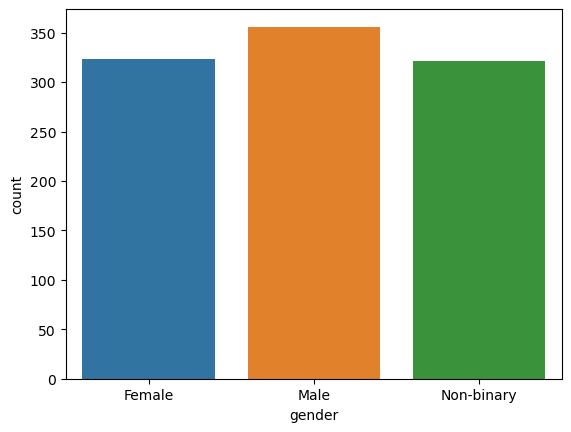

C:\Users\viven\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


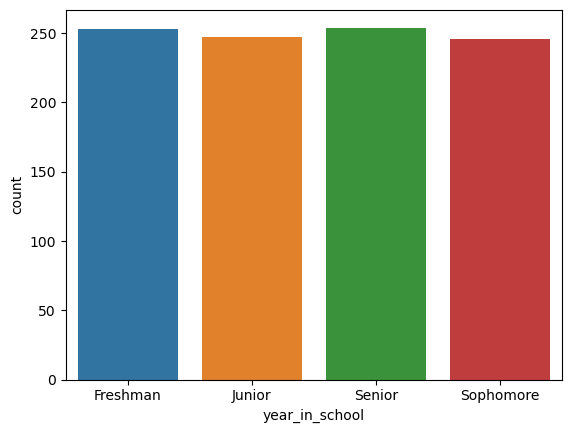

C:\Users\viven\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


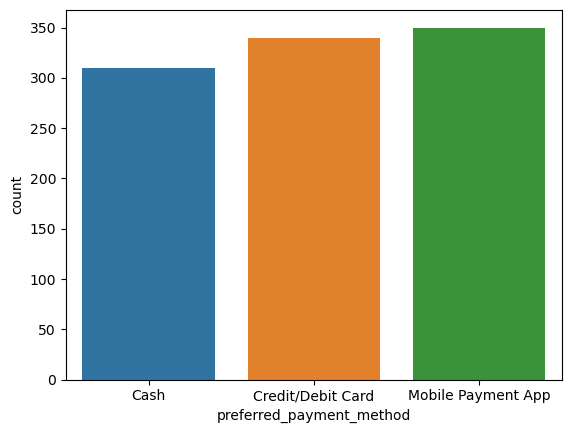

In [11]:
sns.boxplot(data=df[['monthly_income', 'financial_aid', 'tuition', 'housing', 'food']])
plt.show()

sns.countplot(x='gender', data=df)
plt.show()

sns.countplot(x='year_in_school', data=df)
plt.show()

sns.countplot(x='preferred_payment_method', data=df)
plt.show()

C:\Users\viven\AppData\Local\Temp\ipykernel_6928\2120403603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tution_spending_by_major = df.groupby('major')['tuition'].sum()
C:\Users\viven\AppData\Local\Temp\ipykernel_6928\2120403603.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  financial_aid_by_major = df.groupby('major')['financial_aid'].sum()


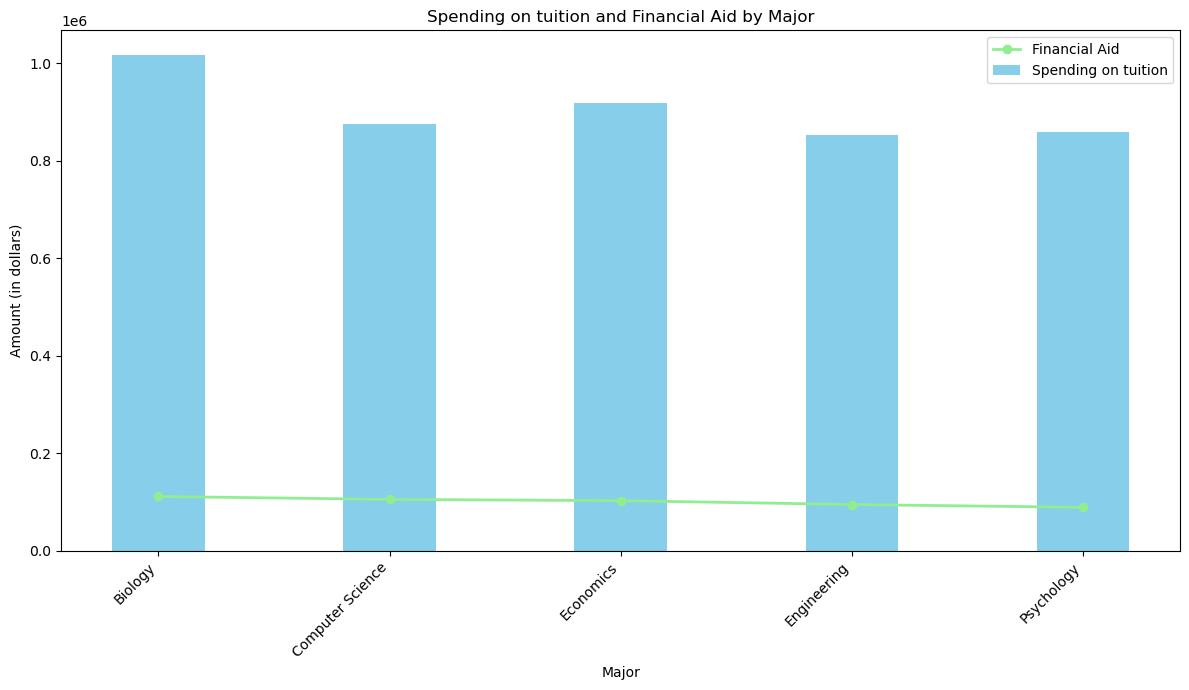

In [9]:
tution_spending_by_major = df.groupby('major')['tuition'].sum()
financial_aid_by_major = df.groupby('major')['financial_aid'].sum()

plt.figure(figsize=(12, 7))  # Adjust figure size for better visualization

# Bar chart for total spending
bar_width = 0.4  # Adjust width of bars
bar_positions = range(len(tution_spending_by_major)) # Position of bars

plt.bar(bar_positions, tution_spending_by_major.values, bar_width, color='skyblue', label='Spending on tuition')

# Line chart for financial aid
plt.plot(bar_positions, financial_aid_by_major.values, color='lightgreen', marker='o', linestyle='-', linewidth=2, label='Financial Aid') #marker adds the circles on the line

# Customize the plot
plt.title('Spending on tuition and Financial Aid by Major')
plt.xlabel('Major')
plt.ylabel('Amount (in dollars)')
plt.xticks(bar_positions, total_spending_by_major.index, rotation=45, ha='right') # Set x-axis ticks and labels
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

X = df[['financial_aid', 'monthly_income', 'books_supplies', 'personal_care', 'entertainment', 'tuition', 'housing', 'food', 'transportation', 'miscellaneous']]
y = df['health_wellness']

model = LinearRegression()
model.fit(X, y)

print(model.coef_)


[ 0.00444019 -0.00585364  0.00112983  0.00636458 -0.0423288   0.00046794
 -0.0014153  -0.00252965  0.03031193 -0.02549333]


In [9]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef)

                Coefficient
financial_aid      0.004440
monthly_income    -0.005854
books_supplies     0.001130
personal_care      0.006365
entertainment     -0.042329
tuition            0.000468
housing           -0.001415
food              -0.002530
transportation     0.030312
miscellaneous     -0.025493


As the data is about spending habits, the spending on health_wellness should be less the corresponding coefficients should be negative
explanation: the coefficient for monthly_income is negative, then an increase in monthly_income would correspond to a decrease in health_wellness spending.

Therefore, the coefficients associated with the predictor variables (such as monthly_income, entertainment, housing, food) are negative, they infer a reduction in spending on health_wellness as these predictors increase.

In [10]:
import statsmodels.api as sm
import numpy as np

X = sm.add_constant(X)

model1 = sm.OLS(y,X).fit()

r_squared = model1.rsquared
adjusted_r_squared = model1.rsquared_adj

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

R-squared: 0.004298904456579322
Adjusted R-squared: -0.00576885181787401


The low r-squared and adjusted r-squared indicated a very poor fit for our multiple linear regression model.
rsquare explains only about 0.43% of the variance in the dependent variable